# Activation functions and Forward Pass

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define random inputs for your network

np.random.seed(21)

x = np.linspace(-20,20,2000).reshape(1000,2)

net_shape = [2,2,1]

nn = {}

nn['w'] = np.random.normal(0,1,size=(net_shape[1],net_shape[0])) 
nn['W'] = np.random.normal(0,1,size=(net_shape[2],net_shape[1]))

nn['b'] = np.random.randn(net_shape[1],1)
nn['B'] = np.random.randn(net_shape[2],1)

w11 = nn['w'][0][0]
w12 = nn['w'][0][1]
w21 = nn['w'][1][0]
w22 = nn['w'][1][1]

b11 = nn['b'][0][0]
b12 = nn['b'][1][0]

w1  = nn['W'][0][0]
w2  = nn['W'][0][1]

b1 = nn['B'][0][0]

In [3]:
# Define activation functions

def sigmoid(x,derivative=False):
    
    s = 1/(1+np.exp(-x))
    
    if (derivative==True):
        return s*(1-s)
    
    return s

def tanh(x,derivative=False):
    
    t = ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))
    
    if (derivative==True):
        
        return (1-t**2)
    
    return t

def linear(x,derivative=False):
    
    if (derivative==True):
        return 1
    return x

def relu(x,derivative=False):
    
    r = np.maximum(0,x)
    
    if (derivative==True):
        
        return 1*(r>0)
    
    return r
    

In [4]:
# Define forward pass function

def forward_pass(inp,nn,activation):
    
    if (activation==relu):
        activation1 = relu
        activation2 = linear
    else:
        activation1=activation
        activation2=activation
        
    #Hidden layer computations
    nn['z'] = np.matmul(nn['w'],inp)+nn['b']
    nn['a'] = activation1(nn['z'])
    
    # Output layer computations
    nn['Z'] = np.matmul(nn['W'],nn['a'])+nn['B']
    nn['A'] = activation2(nn['Z'])
    
    return nn

def forward_passtask(inp,activation):
    
    if (activation==relu):
        activation1 = relu
        activation2 = linear
    else:
        activation1=activation
        activation2=activation
        
        
    # Hidden layer computations
    z11 = (w11*inp[0,0]+w12*inp[1,0])+b11
    z12 = (w21*inp[0,0]+w22*inp[1,0])+b12
    
    a11 = activation1(z11)
    a12 = activation1(z12)
    
    # Output layer computations
    z1  = a11*w1+a12*w2+b1
    o   = activation(z1)
    
    return z11,z12,a11,a12,z1,o    
    
    

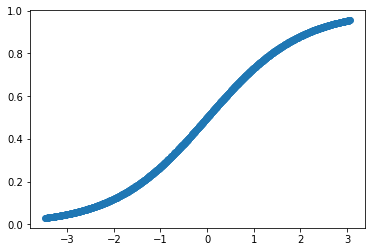

In [5]:
# Call the functions
nn = forward_pass(x.T,nn,sigmoid)
plt.scatter(nn['z'][0,:],nn['a'][0,:])

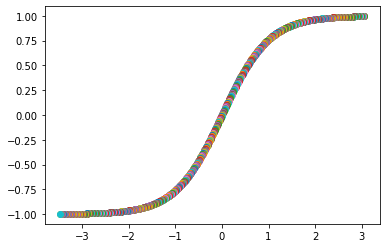

In [6]:
# Compare outputs
for i in range(len(x)):
    inp = np.array([[x[i,0]],[x[i,1]]])
    z11,z12,a11,a12,z1,o = forward_passtask(inp,tanh)
    plt.scatter(z11,a11)